## Make circle plots

In [1]:
%load_ext rpy2.ipython



In [2]:
%%R

library(ggplot2)

yy_lengthen_comma <- function(input_df,grouping_col, col_2split){
  return_df = data.frame()
  input_df = as.data.frame(input_df)
  for (row_i in 1:nrow(input_df)){
    list = strsplit(input_df[row_i,col_2split],split = ",")[[1]]
    group_name = input_df[row_i,grouping_col]
    add_df = data.frame(group = rep(group_name,length(list)), list = list)
    return_df = rbind(return_df, add_df)
  }
  return_df
}

yy_circle_plt =function(df,out_name,grouping){
  #df = df[order(df$logFC),] <- we can order before, not included in function

  pdf(out_name,width = 5,height = 5)
  circos.par(start.degree = 90)
  chordDiagram(df,
               annotationTrack = c("grid"), big.gap = 10,directional = 1,
               grid.col = grouping,
               link.sort = TRUE)

  circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
    xlim = get.cell.meta.data("xlim")
    ylim = get.cell.meta.data("ylim")
    sector.name = get.cell.meta.data("sector.index")
    circos.text(mean(xlim), ylim[1] + 1, sector.name, facing = "clockwise", niceFacing = TRUE, adj = c(0, 0.5))}, bg.border = NA)
  circos.clear()
  dev.off()
}

In [3]:
%%R

dt = read.csv("dt_out/2_invitro_analysis/BMP4_SC_cellrank_driver_genes_top200_CHEA3_Enrichr.tsv", sep = "\t")


In [4]:
%%R
# install.packages("circlize")
library(circlize)

circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))



In [5]:
%%R
head(dt)

      Query.Name Rank Scaled.Rank Set_name     TF Intersect Set.length
 gene_set_query    1   0.0007123    OLIG1  OLIG1        22        295
 gene_set_query    2   0.0014250    SOX10  SOX10        21        296
 gene_set_query    3   0.0021370    OLIG2  OLIG2        19        294
 gene_set_query    4   0.0028490     SOX8   SOX8        14        297
 gene_set_query    5   0.0035610     ST18   ST18        12        297
 gene_set_query    6   0.0042740   ZNF488 ZNF488        10        293
  FET.p.value      FDR Odds.Ratio          Library
   9.351e-19 1.31e-15     17.440 Enrichr--Queries
   1.427e-17 1.00e-14     16.520 Enrichr--Queries
   2.248e-15 1.05e-12     14.950 Enrichr--Queries
   4.809e-10 1.69e-07     10.700 Enrichr--Queries
   4.022e-08 1.13e-05      9.111 Enrichr--Queries
   2.232e-06 4.90e-04      7.646 Enrichr--Queries
                                                                                                                 Overlapping_Genes
 PLEKHB1,PTGDS,BCAS1,GPR37,

In [6]:
%%R
dt_topX <- head(dt[order(dt$Odds.Ratio, decreasing = TRUE),],5)

In [7]:
%%R

# head(dt_top10)

dt_process = yy_lengthen_comma(dt_topX,"TF","Overlapping_Genes")
head(dt_process)

  group    list
 OLIG1 PLEKHB1
 OLIG1   PTGDS
 OLIG1   BCAS1
 OLIG1   GPR37
 OLIG1    PLLP
 OLIG1   APLP1


Only keep duplicated - dont run

In [8]:

%%R
# list_counts <- table(dt_process$list)

# # Filter rows where "list" items are repeated more than 2 times
# dt_duplicated <- dt_process[dt_process$list %in% names(list_counts[list_counts > 2]), ]

# # View the number of rows in the filtered dataset
# nrow(dt_duplicated)



NULL


In [9]:
%%R
dt_duplicated = dt_process

For some reason, I had to add a -1 for the colors.

In [13]:
%%R
## this is just for saving the figure 
pdf("figures/chord_plot_TFenrichment_top5_top200genes_invivo_CHEA3_16Feb2025.pdf",width = 3.5,height = 3.5)
par(cex = 0.5, mar = c(0, 0, 0, 0))
circos.par(start.degree = 90)
chordDiagram(dt_duplicated, annotationTrack = c("grid"), big.gap = 30,
             grid.col = hcl.colors(length(unique(dt_duplicated$list)) + length(unique(dt_duplicated$group))-1, "ag_Sunset"))
circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  xlim = get.cell.meta.data("xlim")
  ylim = get.cell.meta.data("ylim")
  sector.name = get.cell.meta.data("sector.index")
  circos.text(mean(xlim), ylim[1] + 1, sector.name, facing = "clockwise", niceFacing = TRUE, adj = c(0, 0.5))
}, bg.border = NA)

circos.clear()

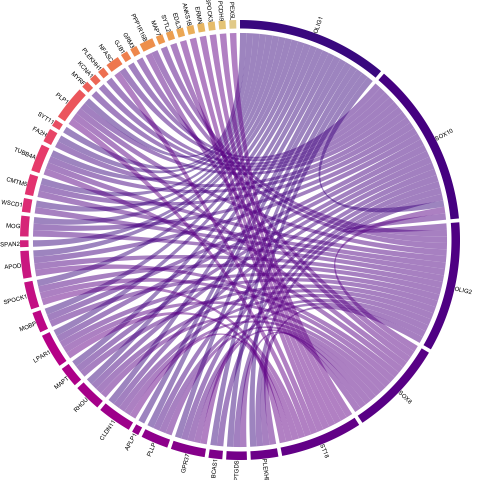

In [11]:
%%R
# pdf("fig/test.pdf",width = 7,height = 7)
par(cex = 0.5, mar = c(0, 0, 0, 0))
circos.par(start.degree = 90)

chordDiagram(dt_process, annotationTrack = c("grid"), big.gap = 30,
             grid.col = hcl.colors(length(unique(dt_process$list)) + length(unique(dt_process$group)) -1, "ag_Sunset"))
circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  xlim = get.cell.meta.data("xlim")
  ylim = get.cell.meta.data("ylim")
  sector.name = get.cell.meta.data("sector.index")
  circos.text(mean(xlim), ylim[1] + 1, sector.name, facing = "clockwise", niceFacing = TRUE, adj = c(0, 0.5))
}, bg.border = NA)

circos.clear()